In [1]:
import numpy as np
import matplotlib
from matplotlib.ticker import MaxNLocator, FixedLocator, LinearLocator
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Ellipse
import matplotlib.cm as cm
from matplotlib import rc
rc('text', usetex=True)
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.collections import PatchCollection
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
font0 = FontProperties()
font = font0.copy()
font.set_size(26)
font.set_family('serif')
labelfont=font0.copy()
labelfont.set_size(20)
labelfont.set_weight('bold')
#params= {'text.latex.preamble' : [r'\usepackage{inputenc}']}
#plt.rcParams.update(params)
from matplotlib.offsetbox import AnchoredText

legendfont=font0.copy()
legendfont.set_size(18)
legendfont.set_weight('bold')

plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{amssymb}'
rc('text', usetex=True)
rc('font',**{'family':'serif', 'serif': ['Computer Modern Roman']})

In [2]:
OPERA = np.loadtxt("dm41s22thmue-opera.dat")
KARMEN = np.loadtxt("dm41s22thmue-karmen.dat")
SBN = np.loadtxt("SBN_3sigma.csv", delimiter=",")

KARMENY = 10**np.unique(np.transpose(KARMEN)[0])
KARMENX = 10**np.unique(np.transpose(KARMEN)[1])
KARMENZ = (np.transpose(KARMEN)[2]).reshape(len(KARMENY), len(KARMENX))

OPERAY = 10**np.unique(np.transpose(OPERA)[0])
OPERAX = 10**np.unique(np.transpose(OPERA)[1])
OPERAZ = (np.transpose(OPERA)[2]).reshape(len(OPERAY), len(OPERAX))

MuB_Inclusive = np.loadtxt("Inclusive_NoBkgOsc_Chi2.dat")
dm41V = np.unique(MuB_Inclusive.T[0])
ssqthV = np.unique(MuB_Inclusive.T[1])

#Asimov Expectation, Full Covariance
ch2VAs = (MuB_Inclusive.T[2]).reshape(len(dm41V), len(ssqthV))

#Asimov Expectation, After applying constraint
ch2VAsPC = (MuB_Inclusive.T[3]).reshape(len(dm41V), len(ssqthV))

#Data result, full covariance
ch2V = (MuB_Inclusive.T[4]).reshape(len(dm41V), len(ssqthV))


MB = np.loadtxt("MiniBooNE_chi2.dat")
MB_dmsq = np.unique(MB.T[0])
MB_ssqt = np.unique(MB.T[1])
MB_ch2 = (MB.T[2]).reshape(len(MB_dmsq), len(MB_ssqt))

# MicroBooNE - 1e1p CCQE
MuB_ccqe    = {}
dm41V_ccqe  = {}
ssqthV_ccqe = {}
Um4V_ccqe   = {}
ch2V_ccqe   = {}
for j, f in enumerate(["CCQE_noBkgOsc_Chi2_Data.dat","CCQE_noBkgOsc_Chi2_Asimov.dat"]):
    MuB_ccqe[j]    = np.loadtxt(f)
    dm41V_ccqe[j]  = 10**np.unique(MuB_ccqe[j].T[0])
    ssqthV_ccqe[j] = 10**np.unique(MuB_ccqe[j].T[1])
    Um4V_ccqe[j]   = np.unique(MuB_ccqe[j].T[2])
    MuB_ccqe[j]    = np.array(np.split(MuB_ccqe[j], len(MuB_ccqe[j])/len(Um4V_ccqe[j]))) # split by (dm41,ssqth)
    MuB_ccqe[j]    = MuB_ccqe[j][np.arange(len(MuB_ccqe[j])),
                                 np.argmin(MuB_ccqe[j][:,:,3], axis=1).T,
                                 :][:,[0,1,3]] # take minimum over all Um4 values for fixed (dm41, ssqth)
    ch2V_ccqe[j]   = np.split(MuB_ccqe[j][:,-1], len(MuB_ccqe[j])/len(ssqthV_ccqe[j]))

In [3]:
CCQEDat = ch2V_ccqe[0]
CCQEDatTrim = CCQEDat[10:][0:40]

CCQEAs = ch2V_ccqe[1]
CCQEAsTrim = CCQEAs[10:][0:40]

In [4]:
def flushalign(ax):
    ic = 0
    for l in ax.get_yticklabels():
        if ic == 0:
            l.set_va("bottom")
        elif ic == len(ax.get_yticklabels())-1:
            l.set_va("top")
        ic += 1

    ic = 0
    for l in ax.get_xticklabels():
        if ic == 0:
            l.set_ha("left")
        elif ic == len(ax.get_xticklabels())-1:
            l.set_ha("right")
        ic += 1

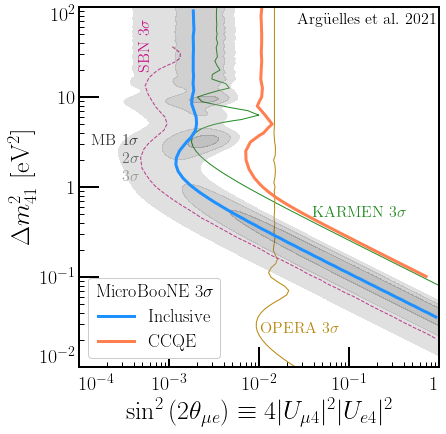

In [5]:
figwid = 5.0
fighei = 5.0
lside = 2.5
rside = 0.75
wwspace = 0.8

ncol = 1
nrow = 1

wid = lside + ncol*figwid + (ncol-1)*wwspace + rside

bot = 1.0
top = 0.5
hhspace = 0.05

hei = bot + nrow*fighei + (nrow-1)*hhspace + top

lfactor = lside/wid
rfactor = rside/wid
bfactor = bot/hei
tfactor = top/hei
wfactor = wwspace/figwid
hfactor = hhspace/fighei

matplotlib.rcParams['axes.linewidth'] = 2.0
fig, axes = plt.subplots(nrow, ncol, figsize=(wid, hei), facecolor='1.0');
fig.subplots_adjust(left = lfactor, bottom=bfactor, right=(1.0-rfactor), top=(1.0-tfactor), wspace=wfactor, hspace=hfactor);

xmin, xmax, ymin, ymax = 1e-4, 1, 1e-2, 1e2

ax = axes
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=2, zorder=30)
ax.set_xlabel(r"$\sin^2\left(2\theta_{\mu e}\right)\equiv 4|U_{\mu 4}|^2 |U_{e4}|^2$", fontproperties=font)        
ax.set_ylabel(r'$\Delta m_{41}^2\ [\mathrm{eV}^2]$', fontproperties=font)        

ax.xaxis.set_major_locator(FixedLocator((1e-4, 1e-3, 1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-2, 1e-1, 1, 10, 100)))
ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=5, width=1)
[l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
[l.set_size(labelfont.get_size()) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=labelfont)
ax.set_yticklabels((r"$10^{-2}$", r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=labelfont)

levs = [np.min(ch2V) + 11.83]
ax.contour(ssqthV, dm41V, ch2V, levels=levs, linestyles=['-'], colors=['dodgerblue'], linewidths=3)
levs_ccqe   = [np.min(CCQEDatTrim) + 11.83]
ax.contour(ssqthV_ccqe[0], (dm41V_ccqe[0])[10:], CCQEDatTrim, levels=levs_ccqe, linestyles=['-'], colors=['coral'], linewidths=3)

levs0MB = np.min(MB_ch2)
levsMB = [levs0MB, levs0MB + 2.30, levs0MB + 6.18, levs0MB + 11.83]
ax.contourf(MB_ssqt, MB_dmsq, MB_ch2, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=0.3)

ax.plot(SBN.T[0], SBN.T[1], color='mediumvioletred', ls='--', lw=1, zorder=0)
ax.contour(KARMENX, KARMENY, KARMENZ, levels=[np.min(KARMENZ)+11.83], colors='forestgreen', linestyles='-', linewidths=1, zorder=0)
ax.contour(OPERAX, OPERAY, OPERAZ, levels=[np.min(OPERAZ)+11.83], colors='darkgoldenrod', linestyles='-', linewidths=1, zorder=0)

ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=3, color='dodgerblue', label=r"$\mathrm{Inclusive}$")
ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=3, color='coral', label=r"$\mathrm{CCQE}$")
leg = ax.legend(loc=3, prop=legendfont, framealpha=1.0, title=r"$\mathrm{MicroBooNE\ 3\sigma}$", title_fontsize = legendfont.get_size(), frameon=True)

ax.annotate(r"$\textrm{Arg\"{u}elles\ et\ al.\ 2021}$", xy=(xmax, ymax), xytext=(-3, -6), textcoords="offset points", ha="right", va="top", size=16, color='k')

ax.annotate(r"$\mathrm{MB\ 1}\sigma$", xy=(6e-4, 3), xytext=(-11,-4), textcoords="offset points", ha="right", va="bottom", size=16, color='#333333')
ax.annotate(r"$2\sigma$", xy=(6e-4, 3), xytext=(-11,-22), textcoords="offset points", ha="right", va="bottom", size=16, color='#666666')
ax.annotate(r"$3\sigma$", xy=(6e-4, 3), xytext=(-11,-40), textcoords="offset points", ha="right", va="bottom", size=16, color='#999999')

ax.annotate(r"$\mathrm{SBN\ 3}\sigma$", xy=(3e-4, 20), xytext=(15, -3), textcoords="offset points", ha="left", va="bottom", size=16, color='mediumvioletred', rotation=90)
ax.annotate(r"$\mathrm{OPERA}\ 3\sigma$", xy=(4e-2, 2e-2), xytext=(-54,4), textcoords="offset points", ha="left", va="bottom", size=16, color="darkgoldenrod")
ax.annotate(r"$\mathrm{KARMEN\ 3\sigma}$", xy=(3e-2, 2e-1), xytext=(10,30), textcoords="offset points", ha="left", va="bottom", size=16, color="forestgreen")
flushalign(ax)

In [6]:
fig.savefig("AppearancePanel_NoBkgOsc.pdf", bbox_inches='tight')

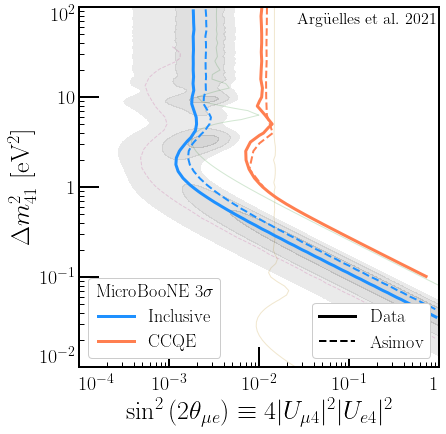

In [7]:
figwid = 5.0
fighei = 5.0
lside = 2.5
rside = 0.75
wwspace = 0.8

ncol = 1
nrow = 1

wid = lside + ncol*figwid + (ncol-1)*wwspace + rside

bot = 1.0
top = 0.5
hhspace = 0.05

lfactor = lside/wid
rfactor = rside/wid
bfactor = bot/hei
tfactor = top/hei
wfactor = wwspace/figwid
hfactor = hhspace/fighei

matplotlib.rcParams['axes.linewidth'] = 2.0
fig, axes = plt.subplots(nrow, ncol, figsize=(wid, hei), facecolor='1.0');
fig.subplots_adjust(left = lfactor, bottom=bfactor, right=(1.0-rfactor), top=(1.0-tfactor), wspace=wfactor, hspace=hfactor);

xmin, xmax, ymin, ymax = 1e-4, 1, 1e-2, 1e2

ax = axes
ax.set_xscale('log')
ax.set_yscale('log')
ax.axis([xmin, xmax, ymin, ymax])
ax.plot([xmin, xmin, xmax, xmax, xmin], [ymin, ymax, ymax, ymin, ymin], ls='-', color='k', lw=2, zorder=30)
ax.set_xlabel(r"$\sin^2\left(2\theta_{\mu e}\right)\equiv 4|U_{\mu 4}|^2 |U_{e4}|^2$", fontproperties=font)        
ax.set_ylabel(r'$\Delta m_{41}^2\ [\mathrm{eV}^2]$', fontproperties=font)        

ax.xaxis.set_major_locator(FixedLocator((1e-4, 1e-3, 1e-2, 1e-1, 1)))
ax.yaxis.set_major_locator(FixedLocator((1e-2, 1e-1, 1, 10, 100)))
ax.tick_params(direction='in', zorder=30, length=20, width=2)
ax.tick_params(direction='in', which='minor', zorder=30, length=5, width=1)
[l.set_size(labelfont.get_size()) for l in ax.get_xticklabels()]
[l.set_size(labelfont.get_size()) for l in ax.get_yticklabels()]
[l.set_position((0.5, -0.015)) for l in ax.get_xticklabels()]
ax.set_xticklabels((r"$10^{-4}$", r"$10^{-3}$", r"$10^{-2}$", r"$10^{-1}$", r"$1$"), fontproperties=labelfont)
ax.set_yticklabels((r"$10^{-2}$", r"$10^{-1}$", r"$1$", r"$10$", r"$10^2$"), fontproperties=labelfont)

levs = [np.min(ch2V) + 11.83]
ax.contour(ssqthV, dm41V, ch2V, levels=levs, linestyles=['-'], colors=['dodgerblue'], linewidths=3)
levsAs = [np.min(ch2VAs) + 11.83]
ax.contour(ssqthV, dm41V, ch2VAs, levels=levsAs, linestyles=['--'], colors=['dodgerblue'], linewidths=2)

levs_ccqe   = [np.min(CCQEDatTrim) + 11.83]
ax.contour(ssqthV_ccqe[0], (dm41V_ccqe[0])[10:], CCQEDatTrim, levels=levs_ccqe, linestyles=['-'], colors=['coral'], linewidths=3)
levsAs_ccqe = [np.min(CCQEAsTrim) + 11.83]
ax.contour(ssqthV_ccqe[1], (dm41V_ccqe[1])[10:], CCQEAsTrim, levels=levsAs_ccqe, linestyles=['--'], colors=['coral'], linewidths=2)

levs0MB = np.min(MB_ch2)
levsMB = [levs0MB, levs0MB + 2.30, levs0MB + 6.18, levs0MB + 11.83]
ax.contourf(MB_ssqt, MB_dmsq, MB_ch2, levels=levsMB, colors=['#333333', '#666666', '#999999', '#CCCCCC'], alpha=0.2)

ax.plot(SBN.T[0], SBN.T[1], color='mediumvioletred', ls='--', lw=1, zorder=0, alpha=0.2)
ax.contour(KARMENX, KARMENY, KARMENZ, levels=[np.min(KARMENZ)+11.83], colors='forestgreen', linestyles='-', linewidths=1, zorder=0, alpha=0.2)
ax.contour(OPERAX, OPERAY, OPERAZ, levels=[np.min(OPERAZ)+11.83], colors='darkgoldenrod', linestyles='-', linewidths=1, zorder=0, alpha=0.2)



ax.annotate(r"$\textrm{Arg\"{u}elles\ et\ al.\ 2021}$", xy=(xmax, ymax), xytext=(-3, -6), textcoords="offset points", ha="right", va="top", size=16, color='k')

h = []
h.append(plt.plot([], [], color='k', ls='-', lw=3)[0])
h.append(plt.plot([], [], color='k', ls='--', lw=2)[0])
leg2 = plt.legend(handles=h, labels=[r"$\mathrm{Data}$", r"$\mathrm{Asimov}$"], prop=legendfont, framealpha=1.0, loc=4)
ax.add_artist(leg2)

ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=3, color='dodgerblue', label=r"$\mathrm{Inclusive}$")
ax.plot([xmin, xmax], [0.1*ymin, 0.1*ymin], lw=3, color='coral', label=r"$\mathrm{CCQE}$")
leg = ax.legend(loc=3, prop=legendfont, framealpha=1.0, title=r"$\mathrm{MicroBooNE\ 3\sigma}$", title_fontsize = legendfont.get_size())
flushalign(ax)

In [8]:
fig.savefig("AsimovComparison.pdf", bbox_inches='tight')